true label: 9, 1.0; adv label: 3, 0.9997710585594177


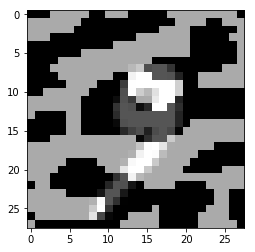

In [106]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from config import DATA_PATH

from src.classifiers import cnn
from src.utils import load_mnist

%matplotlib inline

eps = 1
pic_index = 1000

(_, _), (X_test, Y_test) = load_mnist()

model = cnn.load_model(DATA_PATH + "/classifiers/mnist/cnn/relu/", "best-weights.h5")

advs = np.load(DATA_PATH + "/adversarial/mnist/cnn/relu/fgsm/eps%.2f.npy" % (eps))
y_pred = model.predict(advs)

true_max_conf, true_label = max(Y_test[pic_index,:]), np.argmax(Y_test[pic_index,:])
pred_max_conf, pred_label = max(y_pred[pic_index,:]), np.argmax(y_pred[pic_index,:])

print("true label: {}, {}; adv label: {}, {}".format(true_label, true_max_conf, pred_label, pred_max_conf))

pic_relu = advs[pic_index]
plt.imshow(pic_relu.reshape((28, 28)), cmap="gray")

true label: 9, 1.0; adv label: 3, 1.0


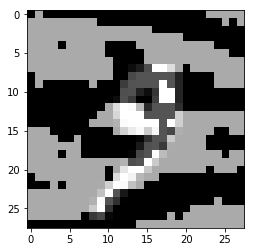

In [107]:
advs = np.load(DATA_PATH + "/adversarial/mnist/cnn/brelu/fgsm/eps%.2f.npy" % (eps))
y_pred = model.predict(advs)

true_max_conf, true_label = max(Y_test[pic_index, :]), np.argmax(Y_test[pic_index, :])
pred_max_conf, pred_label = max(y_pred[pic_index, :]), np.argmax(y_pred[pic_index, :])

print("true label: {}, {}; adv label: {}, {}".format(true_label, true_max_conf, pred_label, pred_max_conf))

pic_brelu = advs[pic_index]
plt.imshow(pic_brelu.reshape((28, 28)), cmap="gray")

In [108]:
from keras import backend as K

layer_idx = 4

get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[4].output])

# true example
pic = X_test[pic_index]
true_output = get_layer_output([pic.reshape(1, *(pic.shape))])[0]

In [109]:
# adversarial examples
# relu
adv_output = get_layer_output([pic_relu.reshape(1, *(pic_relu.shape))])[0]

# brelu
adv2_output = get_layer_output([pic_brelu.reshape(1, *(pic_brelu.shape))])[0]


3473.56


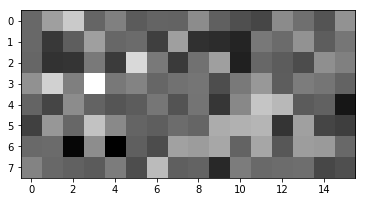

In [110]:
diff = true_output - adv_output
plt.imshow(diff.reshape(8, 16), cmap="gray")

print(np.sum(abs(diff)))

4685.77


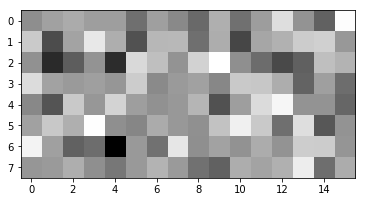

In [111]:
diff = true_output - adv2_output
plt.imshow(diff.reshape(8, 16), cmap="gray")

print(np.sum(abs(diff)))

true label: 3, 1.0; pred label: 3, 1.0


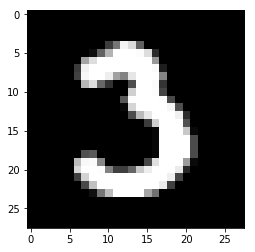

In [112]:
pic_3_idx = 9996
pic_3 = X_test[pic_3_idx]

y_pred = model.predict(X_test)

true_max_conf, true_label = max(Y_test[pic_3_idx, :]), np.argmax(Y_test[pic_3_idx, :])
pred_max_conf, pred_label = max(y_pred[pic_3_idx, :]), np.argmax(y_pred[pic_3_idx, :])

print("true label: {}, {}; pred label: {}, {}".format(true_label, true_max_conf, pred_label, pred_max_conf))

plt.imshow(pic_3.reshape((28, 28)), cmap="gray")

pic3_output = get_layer_output([pic_3.reshape(1, *(pic_3.shape))])[0]

2185.41


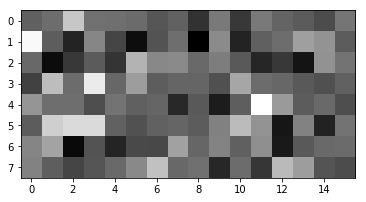

In [113]:
diff = true_output - pic3_output
plt.imshow(diff.reshape(8, 16), cmap="gray")

print(np.sum(abs(diff)))